# 선형 회귀

## 데이터

train data와 test data
- train data: 예측을 위해 학습에 사용하는 데이터셋
- test data: 학습 완료 후 모델을 판별하기 위한 데이터셋

모델을 학습하는 데 사용하는 데이터는 pytorch의 텐서 형태여야 합니다

## 가설

머신러닝에서 임의로 추측해서 세워보거나 경험적으로 알고있는 식을 가설이라고 하고 이 가설이 틀리다고 판단되면 계속 수정해나간다

선형 회귀의 가설:
$y = Wx + b$

- 이 때, $W$를 가중치, $b$를 편향이라고 함


## 비용 함수

아래의 용어는 전부 같다
- **비용 함수(cost function)**
- **손실 함수(loss function)**
- 오차 함수(error function)
- 목적 함수(objective function)

2차원 훈련 데이터들이 있고 이 데이터들을 가장 잘 표현하는 직선을 그리는 것이 목표라고 하면 직선과 데이터들의 차이가 생긴다.
이를 오차라고 한다

모든 훈련 데이터에 대해서 오차를 구하고 총 오차를 구하는 방법으로 모든 오차를 합하는 방법을 채택한다고 가정한다

|실제값|예측값|오차|
|--|--|--|
|25|27|-2|
|50|40|10|
|42|53|-9|
|61|66|-5|

모든 오차를 더하면 음수와 양수의 값이 모두 존재하기 때문에 모든 오차가 포함되지 않게 된다.
따라서 오차값을 모두 제곱하고 더하는 방법으로 오차를 구할 수 있는데 이를 평균 제곱 오차(Mean Squared Error, MSE)라고 한다.
이를 함수로 정의해서 값을 최소가 되도록 하는 W와 b를 구하는 과정을 훈련이라고 한다

## 옵티마이저

- 경사하강법

비용 함수의 최솟값을 구하는 데 사용되는 것이 옵티마이저(Optimizer) 알고리즘이다. 최적화 알고리즘이라고도 불리는데 이 알고리즘을 통해 W와 b를 찾아내는 과정을 학습이라고 한다. 가장 기본적인 최적화 알고리즘으로 경사 하강법(Gradient Descent)이 있다.

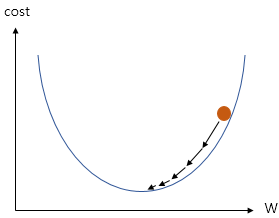

위에서 정의했던 가중치 $W$는 직선에서 기울기라고도 할 수 있다. 이 기울기가 커지거나 작아질수록 cost값은 계속 커진다.

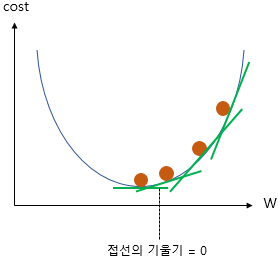

따라서 cost 값이 가장 작은 점을 찾기 위해서 접선의 기울기가 0인 지점을 계속해서 찾아간다. 기울기가 갱신되는 공식은 다음과 같다.

$$W := W - \alpha \times (기울기)$$

- 기울기가 음수일 때

위의 그래프에서 접선의 기울기가 0인 지점의 왼쪽에 존재하므로 W의 값이 증가해야한다.

- 기울기가 양수일 때

위의 그래프에서 접선의 기울기가 0인 지점의 오른쪽에 존재하므로 W의 값이 감소해야한다.

$$W := W - α\frac{∂}{∂W}cost(W)$$

기울기는 cost를 미분한 것과 같으므로 W를 갱신하는 공식은 위와 같이 표현할 수 있다. 이 때 α는 W를 얼마나 변경할지를 결정하는 값으로 **학습률**이라고 한다.

학습률의 값을 조정해줄 때 너무 큰 값을 지정하면 W가 수렴하지 않고 발산하게 되고 너무 작은 값을 지정하면 학습 시간이 오래 걸린다. 

## 파이토치로 선형 회귀 구현

### 모듈 로드 및 기본 설정

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
# 랜덤 시드값 지정
torch.manual_seed(1)

### 변수 선언

In [5]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


### 가중치와 편향 초기화

In [49]:
# requires_grad=True: 이 변수는 학습을 통해 값이 변경된다
W = torch.zeros(1, requires_grad=True)

In [50]:
W

tensor([0.], requires_grad=True)

In [51]:
b = torch.zeros(1, requires_grad=True)

In [52]:
b

tensor([0.], requires_grad=True)

### 가설 설정

In [53]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### 비용 함수 선언

In [54]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


### 경사 하강법 구현

In [55]:
optimizer = optim.SGD([W, b], lr=0.01)

In [56]:
# gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

optimizer.zero_grad()를 실행하여 미분을 통해 얻은 기울기를 0으로 초기화.
그 다음 cost.backward() 함수를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산된다. 그 다음 optimizer.step() 함수를 호출해서 인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 학습률(0.01)을 적용하여 업데이트한다

In [57]:
W, b

(tensor([0.1867], requires_grad=True), tensor([0.0800], requires_grad=True))

In [60]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

EPOCHS = 100
LEARNING_RATE = 1e-2
optimizer = optim.SGD([W, b], lr=LEARNING_RATE)

for epoch in range(1, EPOCHS+1):
    hypothesis = W * x_train + b
    cost = torch.mean((hypothesis - y_train)**2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    